# Problem Statement
Perform Exploratory Data Analysis (EDA), data visualization, and developing a predictive model to estimate revenue or subscribers based on the provided dataset.

# Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('youtube_channel_real_performance_analytics.csv')
df.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),Playback-Based CPM (USD),CPM (USD),Ad Impressions,Estimated AdSense Revenue (USD),DoubleClick Revenue (USD),YouTube Ads Revenue (USD),Watch Page Ads Revenue (USD),YouTube Premium (USD),Transaction Revenue (USD),Transactions,Revenue from Transactions (USD),Reactions,Chat Messages Count,Reminders Set,Stream Hours,Remix Views,Remix Count,Subscribers from Posts,New Comments,Shares,Like Rate (%),Dislikes,Likes,Unsubscribes,New Subscribers,Returned Items (USD),Unconfirmed Commissions (USD),Approved Commissions (USD),Orders,Total Sales Volume (USD),End Screen Click-Through Rate (%),End Screen Impressions,End Screen Clicks,Teaser Click-Through Rate (%),Teaser Impressions,Teaser Clicks,Card Click-Through Rate (%),Card Impressions,Card Clicks,Views per Playlist Start,Playlist Views,Playlist Watch Time (hours),Clip Watch Time (hours),Clip Views,YouTube Premium Watch Time (hours),YouTube Premium Views,Returning Viewers,New Viewers,Average Views per User,Unique Viewers,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201,02-06-2016,0,2,6,2016,Thursday,0.024,723,1.386,1.021,981,0.527,0.024,1.002,0.551,0.010,0,0,0,0,0,0,0,0,0,0,91,12,96.86,30,924,3,54,0,0,0,0,0,4.35,46,2,0.0,0,0,0.0,0,0,3.3333,10,0.2974,0.1575,10,2.5358,152,0,0,0,0,0,0,40.38,81,23531,533.1636,51,0.561,41118,27.66
1,1,391,10-06-2016,8,10,6,2016,Friday,0.056,727,1.612,1.361,861,0.635,0.009,1.172,0.645,0.004,0,0,0,0,0,0,0,0,0,0,35,5,94.71,18,322,1,34,0,0,0,0,0,0.00,0,0,0.0,0,0,0.0,0,0,3.5000,7,0.5187,0.0000,0,0.8911,32,0,0,0,0,0,0,39.85,156,11478,500.5628,33,0.648,41627,5.85
2,2,133,14-06-2016,4,14,6,2016,Tuesday,0.014,76,2.105,1.818,88,0.088,0.000,0.160,0.088,0.001,0,0,0,0,0,0,0,0,0,0,0,4,92.28,20,239,0,8,0,0,0,0,0,0.00,0,0,0.0,0,0,0.0,0,0,0.0000,11,0.1683,0.0000,0,0.1838,28,0,0,0,0,0,0,30.88,41,6153,70.7287,8,0.089,38713,7.07
3,3,14,29-06-2016,15,29,6,2016,Wednesday,0.004,18,1.667,0.857,35,0.016,0.000,0.030,0.016,0.000,0,0,0,0,0,0,0,0,0,0,12,7,94.02,14,220,0,2,0,0,0,0,0,0.00,0,0,0.0,0,0,0.0,0,0,6.6667,20,0.0640,0.0000,0,0.0711,20,0,0,0,0,0,0,103.05,14,4398,17.6251,2,0.017,35245,5.60
4,4,45,01-07-2016,2,1,7,2016,Friday,0.000,0,0.000,0.000,0,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,50,7,76.98,180,602,3,31,0,0,0,0,0,0.00,4,0,0.0,0,0,0.0,0,0,1.6667,10,0.0611,0.0000,0,0.2519,39,0,0,0,0,0,0,55.70,25,14659,104.3341,28,0.000,46218,8.62


## Handle Missing Values

In [ ]:
# Dropping few columns, as all their values are zero
df = df.drop(['Transaction Revenue (USD)', 'Transactions','Revenue from Transactions (USD)', 'Reactions',
              'Chat Messages Count','Reminders Set', 'Stream Hours', 'Remix Views', 'Remix Count',
              'Subscribers from Posts','Returned Items (USD)','Unconfirmed Commissions (USD)',
              'Approved Commissions (USD)', 'Orders','Total Sales Volume (USD)','Returning Viewers', 'New Viewers',
              'Average Views per User','Unique Viewers'],axis=1)

In [ ]:
col = ['Teaser Click-Through Rate (%)','Teaser Clicks','Card Click-Through Rate (%)', 'Card Clicks','Watched (Not Skipped) (%)']
for i in col :
  df[i] = df[i].fillna(df[i].median())

In [ ]:
print('Columns with null values : \n')
print(df[df.isnull().sum(axis=1) >0])

Columns with null values : 

Empty DataFrame
Columns: [ID, Video Duration, Video Publish Time, Days Since Publish, Day, Month, Year, Day of Week, Revenue per 1000 Views (USD), Monetized Playbacks (Estimate), Playback-Based CPM (USD), CPM (USD), Ad Impressions, Estimated AdSense Revenue (USD), DoubleClick Revenue (USD), YouTube Ads Revenue (USD), Watch Page Ads Revenue (USD), YouTube Premium (USD), New Comments, Shares, Like Rate (%), Dislikes, Likes, Unsubscribes, New Subscribers, End Screen Click-Through Rate (%), End Screen Impressions, End Screen Clicks, Teaser Click-Through Rate (%), Teaser Impressions, Teaser Clicks, Card Click-Through Rate (%), Card Impressions, Card Clicks, Views per Playlist Start, Playlist Views, Playlist Watch Time (hours), Clip Watch Time (hours), Clip Views, YouTube Premium Watch Time (hours), YouTube Premium Views, Watched (Not Skipped) (%), Feed Impressions, Average View Percentage (%), Average View Duration, Views, Watch Time (hours), Subscribers, Estima

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

## Summary Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 51 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    int64  
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    int64  
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

In [ ]:
df.describe(include = ['float64'])

,Revenue per 1000 Views (USD),Playback-Based CPM (USD),CPM (USD),Estimated AdSense Revenue (USD),DoubleClick Revenue (USD),YouTube Ads Revenue (USD),Watch Page Ads Revenue (USD),YouTube Premium (USD),Like Rate (%),End Screen Click-Through Rate (%),Teaser Click-Through Rate (%),Card Click-Through Rate (%),Views per Playlist Start,Playlist Watch Time (hours),Clip Watch Time (hours),YouTube Premium Watch Time (hours),Average View Percentage (%),Watch Time (hours),Estimated Revenue (USD),Video Thumbnail CTR (%)
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,0.112283,1.553734,1.059005,7.811525,0.635734,15.363964,8.447223,0.404810,97.339203,1.551676,0.324725,3.291044,2.644910,24.830608,0.068246,115.206959,45.970989,10058.965455,8.852052,7.914615
std,0.179668,1.078549,0.728380,12.778813,1.393079,23.614172,12.993395,0.595196,2.308451,3.031638,0.923491,10.338442,1.917453,38.958396,0.209388,128.827059,12.457470,9516.160361,13.414650,2.903383
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.050000,12.697900,0.000000,0.620000
25%,0.015000,0.817750,0.522000,0.167000,0.000000,0.344500,0.171500,0.005000,96.597500,0.000000,0.000000,0.000000,1.720275,0.409050,0.000000,8.999700,40.252500,2759.404250,0.443250,6.420000
50%,0.050000,1.540500,1.155500,3.329500,0.000000,7.527500,4.139500,0.132000,97.740000,0.000000,0.000000,0.000000,2.363500,2.350500,0.000000,83.192350,45.465000,8102.962950,4.285000,8.395000
75%,0.143500,2.025250,1.458750,10.195500,0.526500,20.071750,11.042750,0.588500,98.975000,2.065000,0.000000,0.000000,3.033450,39.475550,0.033725,172.145600,51.010000,14084.498550,11.476250,9.920000
max,1.600000,7.385000,6.295000,100.564000,7.850000,182.796000,100.564000,3.682000,99.720000,35.190000,7.140000,57.890000,14.000000,171.351500,2.421200,788.467300,117.300000,53794.658700,103.117000,27.660000


In [ ]:
df.describe(include = ['int64'])

,ID,Video Duration,Days Since Publish,Day,Month,Year,Monetized Playbacks (Estimate),Ad Impressions,New Comments,Shares,Dislikes,Likes,Unsubscribes,New Subscribers,End Screen Impressions,End Screen Clicks,Teaser Impressions,Teaser Clicks,Card Impressions,Card Clicks,Playlist Views,Clip Views,YouTube Premium Views,Watched (Not Skipped) (%),Feed Impressions,Average View Duration,Views,Subscribers,Impressions
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,3.640000e+02
mean,181.500000,664.239011,8.406593,15.807692,6.642857,2018.736264,8934.711538,15117.953297,333.846154,252.958791,123.961538,5526.733516,28.906593,349.931319,6561.980769,224.934066,4131.986264,81.318681,142.689560,19.115385,300.810440,5.923077,1303.763736,0.824176,0.008242,285.612637,128800.101648,321.024725,9.595286e+05
std,105.221988,330.646183,15.371239,8.924004,3.421521,2.530629,12967.843236,24339.924215,291.934648,363.016405,128.311620,4465.210998,48.591932,468.539050,14829.019211,787.523948,13523.976449,352.030814,669.114645,82.516801,555.976093,14.290941,1343.028080,9.053369,0.090534,116.595678,118209.844270,444.594763,1.180519e+06
min,0.000000,9.000000,0.000000,1.000000,1.000000,2016.000000,0.000000,0.000000,0.000000,1.000000,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2461.000000,-3.000000,3.222800e+04
25%,90.750000,496.000000,3.000000,8.000000,4.000000,2017.000000,349.500000,368.500000,104.750000,38.000000,27.000000,1205.500000,3.000000,44.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,170.500000,0.000000,0.000000,233.750000,27160.500000,41.000000,1.317082e+05
50%,181.500000,613.000000,5.000000,16.000000,7.000000,2018.000000,3564.000000,5892.000000,262.500000,149.000000,85.500000,5172.000000,20.000000,200.000000,79.500000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000,958.000000,0.000000,0.000000,286.500000,101950.500000,180.000000,6.204065e+05
75%,272.250000,786.500000,9.000000,23.000000,10.000000,2021.000000,13579.250000,19372.000000,485.000000,313.250000,179.250000,8504.750000,41.000000,464.000000,10318.750000,182.000000,36.000000,0.000000,1.250000,0.000000,441.000000,5.000000,2011.500000,0.000000,0.000000,344.250000,198169.500000,421.250000,1.368464e+06
max,363.000000,2311.000000,260.000000,31.000000,12.000000,2024.000000,100566.000000,141634.000000,2510.000000,4190.000000,818.000000,27222.000000,713.000000,3925.000000,141424.000000,7852.000000,151143.000000,3233.000000,8973.000000,1034.000000,4613.000000,125.000000,8633.000000,100.000000,1.000000,776.000000,670990.000000,3728.000000,1.270226e+07


In [ ]:
df.describe(include = ['object'])

,Video Publish Time,Day of Week
count,364,364
unique,357,7
top,09-06-2017,Sunday
freq,2,63


## Handling Outliers

In [ ]:
# Remove outliers using IQR technique

numeric_cols = df.select_dtypes(include=['number'])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))

# Replace outliers with median
for col in numeric_cols:
    median = df[col].median()
    df.loc[outliers[col], col] = median

/tmp/ipython-input-107-1548455288.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '181.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers[col], col] = median
/tmp/ipython-input-107-1548455288.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '262.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers[col], col] = median
/tmp/ipython-input-107-1548455288.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '85.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers[col], col] = median
/tmp/ipython-input-107-1548455288.py:14: FutureWarning: Setting an item of incompatible dtype i

## Feature Engineering

In [ ]:
le = LabelEncoder()

print(df['Day of Week'])
df['Day of Week'] = le.fit_transform(df['Day of Week'])
print(df['Day of Week'])
# fri=0

0       Thursday
1         Friday
2        Tuesday
3      Wednesday
4         Friday
         ...    
359       Sunday
360       Sunday
361       Monday
362    Wednesday
363       Friday
Name: Day of Week, Length: 364, dtype: object
0      4
1      0
2      5
3      6
4      0
      ..
359    3
360    3
361    1
362    6
363    0
Name: Day of Week, Length: 364, dtype: int64


In [ ]:
# Convert 'Video Publish Time' to datetime
df['Video Publish Time'] = pd.to_datetime(df['Video Publish Time'], errors='coerce')

In [ ]:
# Create new features

# Create revenue per view
df['Revenue per View'] = df['Estimated Revenue (USD)'] / df['Views']

# Create engagement rate
df['Engagement Rate'] = (df['Likes'] + df['Shares'] + df['New Comments']) / df['Views'] * 100

df[['Revenue per View', 'Engagement Rate']].head()

,Revenue per View,Engagement Rate
0,0.000024,4.364455
1,0.000056,3.153860
2,0.000014,3.949293
3,0.000004,5.434288
4,0.000000,4.495532


# Data Visualization

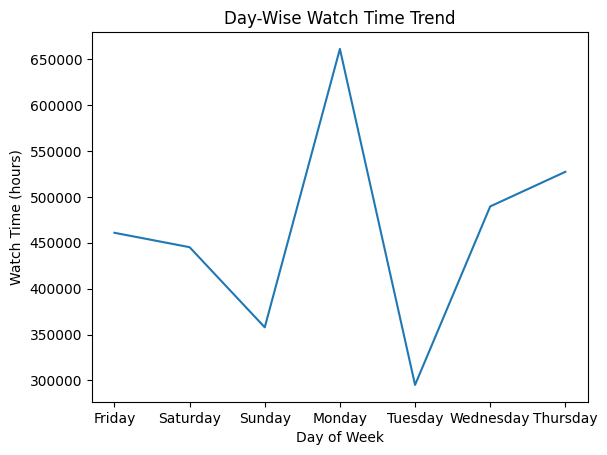

In [ ]:
grp = df.groupby('Day of Week')['Watch Time (hours)'].sum()
grp.plot(kind='line')
plt.xticks([0,1,2,3,4,5,6] , ['Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday'])
plt.ylabel("Watch Time (hours)")
plt.xlabel("Day of Week")
plt.title("Day-Wise Watch Time Trend");
# Note :
# 1) Monday has max Watch Time (hours)


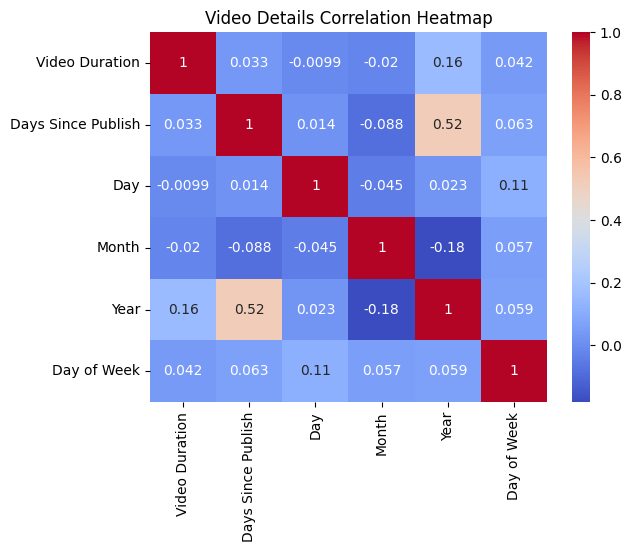

In [ ]:
# Video Details corr heatmap
col = df[['Video Duration', 'Days Since Publish','Day', 'Month', 'Year', 'Day of Week']]

# plt.figure(figsize=(12, 8))
sns.heatmap(col.corr(), annot=True, cmap="coolwarm")
plt.title("Video Details Correlation Heatmap")
plt.show()


# Note:
# 1) Weak Positive Correlation between "Video Duration" and "Year" (0.16)
#    Insight: There's a slight tendency for videos published in more recent years to be longer in duration.

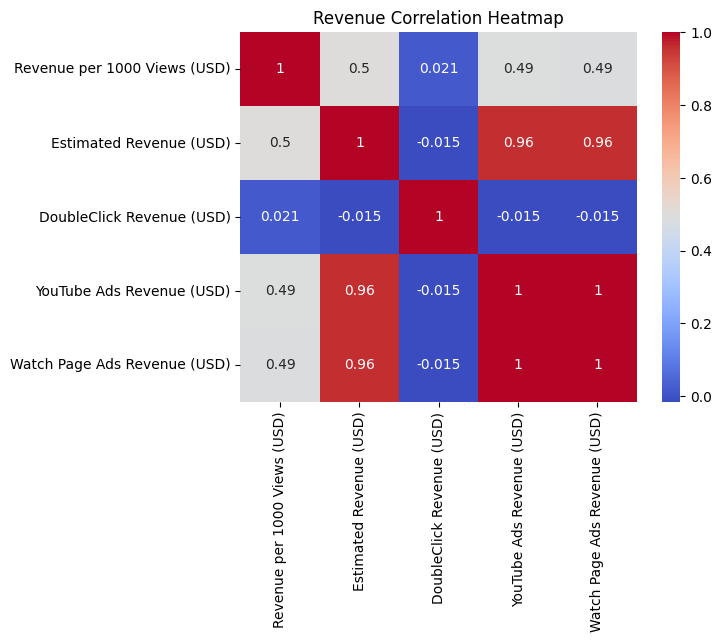

In [ ]:
# Revenue corr heatmap
col = df[['Revenue per 1000 Views (USD)','Estimated Revenue (USD)', 'DoubleClick Revenue (USD)',
         'YouTube Ads Revenue (USD)','Watch Page Ads Revenue (USD)']]

# plt.figure(figsize=(12, 8))
sns.heatmap(col.corr(), annot=True, cmap="coolwarm")
plt.title("Revenue Correlation Heatmap")
plt.show()


# Note:
# 1) Estimated Revenue (USD) , YouTube Ads Revenue (USD) , Watch Page Ads Revenue (USD) have strong positive corr
#    Insight: "Estimated Revenue" is driven by "YouTube Ads Revenue" and "Watch Page Ads Revenue."
# 2) Moderate Positive Correlation between "Revenue per 1000 Views (USD)" and "YouTube Ads Revenue (USD)", and "Watch Page Ads Revenue (USD)"
#    Insight: Revenue per 1000 Views is generated by ads
# 3) Very Weak (Near Zero) Correlation with "DoubleClick Revenue (USD)"
#    Insight: "DoubleClick Revenue (USD)" shows almost no linear correlation with any of the other revenue metrics
#    (values are very close to 0, like 0.021, -0.015).

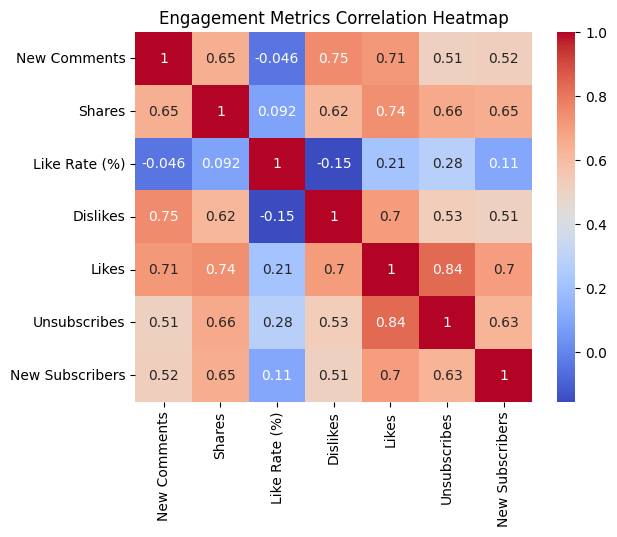

In [ ]:
# Engagement Metrics corr heatmap
col = df[['New Comments', 'Shares', 'Like Rate (%)','Dislikes', 'Likes', 'Unsubscribes','New Subscribers']]

# plt.figure(figsize=(12, 8))
sns.heatmap(col.corr(), annot=True, cmap="coolwarm")
plt.title("Engagement Metrics Correlation Heatmap")
plt.show()


# Note:
# 1) Shares, New Comments and New Subscribers increases along with Likes
# 2) New Subscribers is directly propertional to   Dislikes
#                                                 ----------
#                                                   Share
# 3) Likes and Unsubscribes (0.84) is a surprisingly strong positive correlation.
#    Insight : The video might be highly engaging but also controversial.Videos that perform well (get many likes) might be
#              pushed to a wider audience, some of whom are not the target demographic and thus unsubscribe.

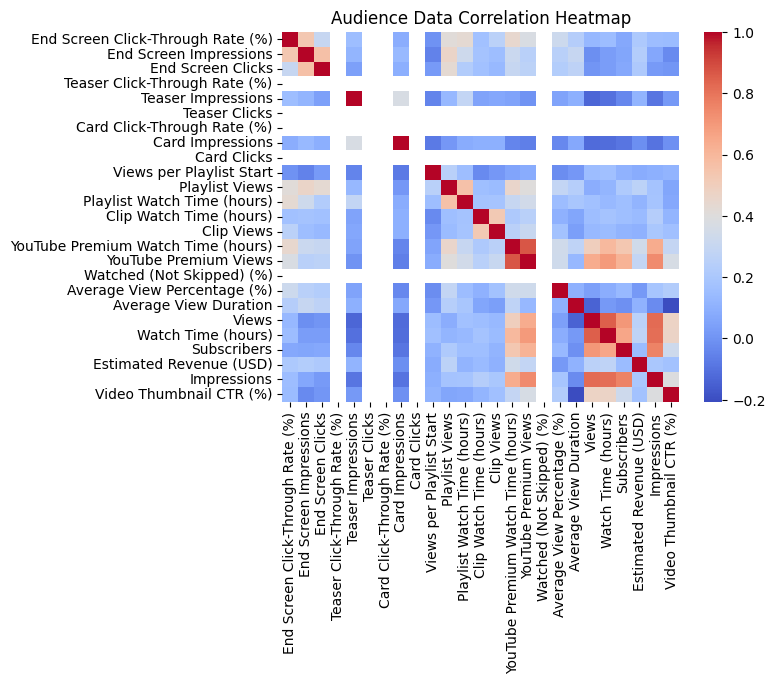

In [ ]:
# Audience Data corr heatmap
col = df[['End Screen Click-Through Rate (%)','End Screen Impressions', 'End Screen Clicks','Teaser Click-Through Rate (%)',
          'Teaser Impressions', 'Teaser Clicks','Card Click-Through Rate (%)', 'Card Impressions', 'Card Clicks',
          'Views per Playlist Start', 'Playlist Views','Playlist Watch Time (hours)', 'Clip Watch Time (hours)', 'Clip Views',
          'YouTube Premium Watch Time (hours)', 'YouTube Premium Views','Watched (Not Skipped) (%)',
          'Average View Percentage (%)','Average View Duration', 'Views', 'Watch Time (hours)', 'Subscribers',
          'Estimated Revenue (USD)', 'Impressions', 'Video Thumbnail CTR (%)']]

# 'Teaser Click-Through Rate (%)','Teaser Clicks','Card Click-Through Rate (%)', 'Card Clicks','Watched (Not Skipped) (%)'

# plt.figure(figsize=(12, 8))
sns.heatmap(col.corr(), annot=False, cmap="coolwarm")
plt.title("Audience Data Correlation Heatmap")
plt.show()


# Note:
# 1) End Screen Click-Through Rate (%), End Screen Impressions and End Screen Clicks are highly correlated among
#    themselves.This is expected, as clicks are a function of impressions and CTR.
# 2) Teaser Click-Through Rate (%), Teaser Impressions, and Teaser Clicks also show strong internal correlations.
# 3) Card Click-Through Rate (%) , Card Impressions, and Card Clicks are strongly correlated internally.
# 4) Playlist Watch Time (hours), Clip Watch Time (hours), YouTube Premium Watch Time (hours), Watch Time (hours),
#    Average View Duration", and "Views" are all highly positively correlated.
#    Insight : This indicates that videos with more views generally accumulate more watch time across various
#              categories and have longer average view durations.
# 5) Longer watch times are strongly associated with higher revenue and lead to more subscribers.
# 6) A higher click-through rate on the video thumbnail means more people are clicking to watch the video after seeing it.
#    This directly leads to more views, which in turn contributes to more subscribers and revenue. This highlights the
#    importance of an engaging thumbnail for initial audience attraction.

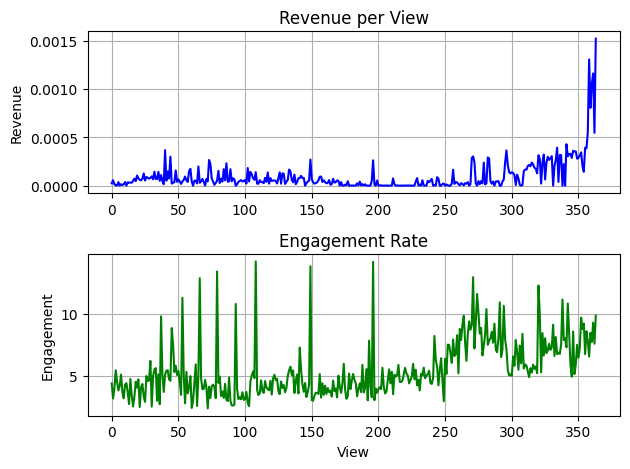

In [ ]:
# First subplot - Revenue per View
plt.subplot(2, 1, 1)  # (rows, cols, index)
plt.plot(df['Revenue per View'], color='blue')
plt.title('Revenue per View')
plt.ylabel('Revenue')
plt.grid(True)

# Second subplot - Engagement Rate
plt.subplot(2, 1, 2)
plt.plot(df['Engagement Rate'], color='green')
plt.title('Engagement Rate')
plt.ylabel('Engagement')
plt.xlabel('View')
plt.grid(True)

plt.tight_layout()
plt.show()


# Note :
# The data indicates that as content accumulates more views, there's a tendency for both the engagement rate and the revenue
# generated per view to increase, particularly in later stages.

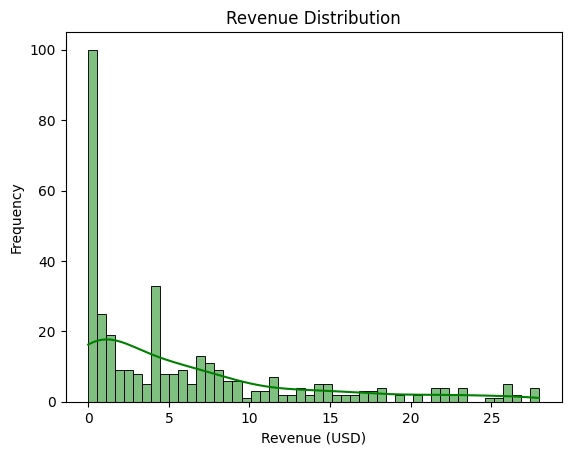

In [ ]:
# Revenue Distribution
sns.histplot(df['Estimated Revenue (USD)'], bins=50,kde=True, color='green')
plt.title("Revenue Distribution")
plt.xlabel("Revenue (USD)")
plt.ylabel("Frequency")
plt.show()


# Note :
# The revenue distribution is highly unequal, with a large volume of content generating very little income, and a small
# fraction of content responsible for the majority of the higher earnings.

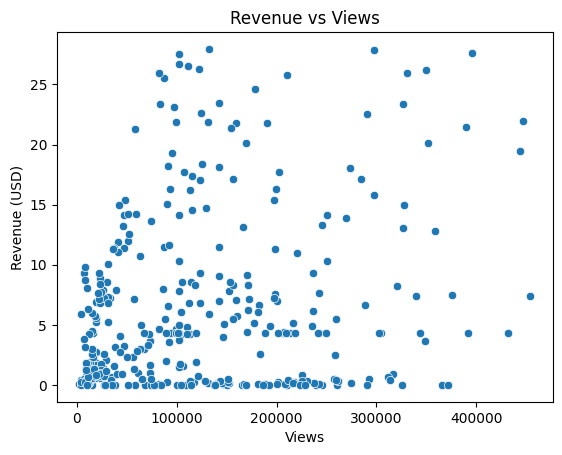

In [ ]:
# Revenue vs Views
sns.scatterplot(x=df['Views'], y=df['Estimated Revenue (USD)'])
plt.title("Revenue vs Views")
plt.xlabel("Views")
plt.ylabel("Revenue (USD)")
plt.show()



# Insight :  While more views generally lead to more revenue, the relationship is not perfectly linear. Other factors
#            significantly influence how efficiently views are converted into revenue, leading to a wide range of
#            earnings even for content with similar view counts. There's a clear segment of content that achieves high
#            views but yields minimal revenue.

In [ ]:
# Top Performers by Revenue
top_videos = df.sort_values(by='Estimated Revenue (USD)',ascending=False).head(10)
top_videos[['ID', 'Estimated Revenue (USD)', 'Views','Subscribers']]

,ID,Estimated Revenue (USD),Views,Subscribers
297,297.0,27.955,131817.0,232
157,157.0,27.882,298148.0,275
240,240.0,27.575,396276.0,180
149,149.0,27.505,101950.5,180
196,196.0,26.727,101950.5,180
315,315.0,26.563,111195.0,266
313,313.0,26.275,122667.0,312
211,211.0,26.212,349855.0,754
229,229.0,25.950,330893.0,561
320,320.0,25.936,82503.0,357


# Predictive model
Predictive model to estimate revenue or subscribers based on the dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Define features and target variable
X = numeric_cols.drop(columns=['Estimated Revenue (USD)'])
y = numeric_cols['Estimated Revenue (USD)']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Calculate the prediction accuracy
mse = mean_squared_error(y_test, y_pred)
print('RMSE = ',np.sqrt(mse))

RMSE =  0.0004752978199724935
